<a href="https://colab.research.google.com/github/mrkshibly/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Exploration
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pickle
import pickle

# Classification models
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn import neighbors

from sklearn.neural_network import MLPClassifier

# Onehotencoding
from sklearn.preprocessing import OneHotEncoder

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# train_test_split
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import classification_report, f1_score, precision_score, confusion_matrix, recall_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
data.duplicated().sum()

np.int64(3854)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi_score            100000 non-null  float64
 6   haemoglobin_level    100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   is_diabetic          100000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [ ]:
data.describe()

,age,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,27.320767,5.527507,138.058060,0.085000
std,22.535417,6.636783,1.070672,40.708136,0.278883
min,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi_score,0
haemoglobin_level,0
blood_glucose_level,0
is_diabetic,0


In [ ]:
import pandas as pd  # Ensure pandas is imported

# Load your data into a DataFrame (replace 'your_data.csv' with your actual file)
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes_prediction_dataset.csv")  # ⚠️ Change this to your file path

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned data
output_path = "/content/drive/MyDrive/Diabetes Prediction/diabetes_cleaned.csv"
df_cleaned.to_csv(output_path, index=False)

print("Duplicate values removed and cleaned file saved.")

Duplicate values removed and cleaned file saved.


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes_cleaned.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0



KNN Feature Importance:


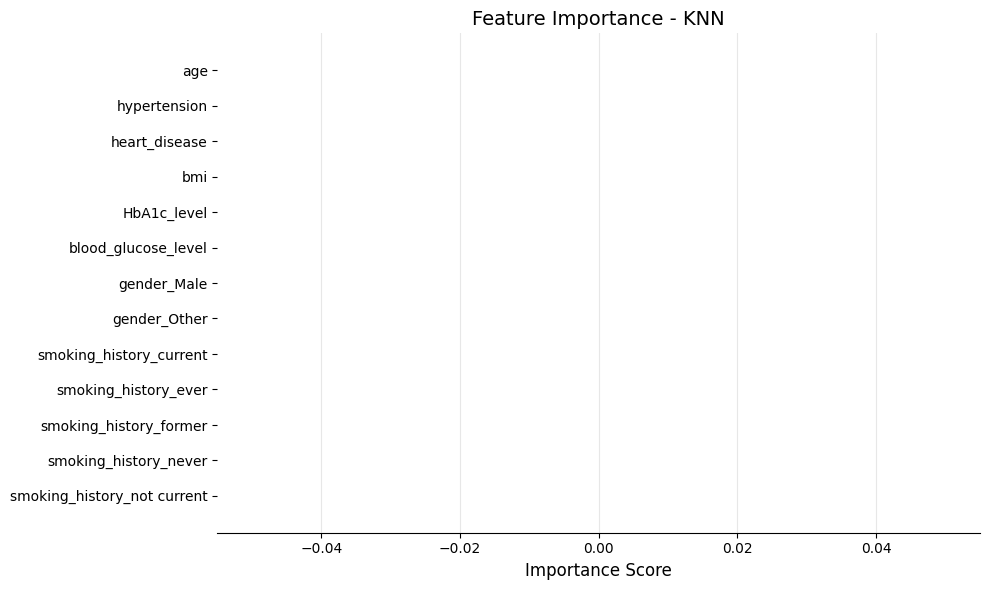

                   feature  importance
0                      age         0.0
1             hypertension         0.0
2            heart_disease         0.0
3                      bmi         0.0
4              HbA1c_level         0.0
5      blood_glucose_level         0.0
6              gender_Male         0.0
7             gender_Other         0.0
8  smoking_history_current         0.0
9     smoking_history_ever         0.0

Logistic Regression Feature Importance:


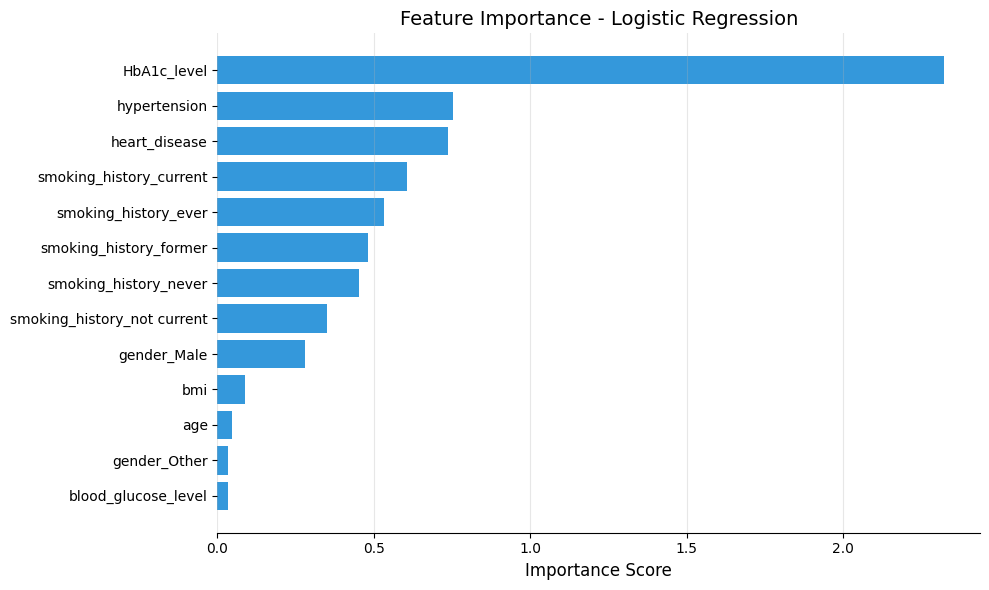

                        feature  importance
4                   HbA1c_level    2.322470
1                  hypertension    0.752556
2                 heart_disease    0.736873
8       smoking_history_current    0.607551
9          smoking_history_ever    0.532106
10       smoking_history_former    0.479889
11        smoking_history_never    0.451339
12  smoking_history_not current    0.350960
6                   gender_Male    0.278399
3                           bmi    0.086727

Decision Tree Feature Importance:


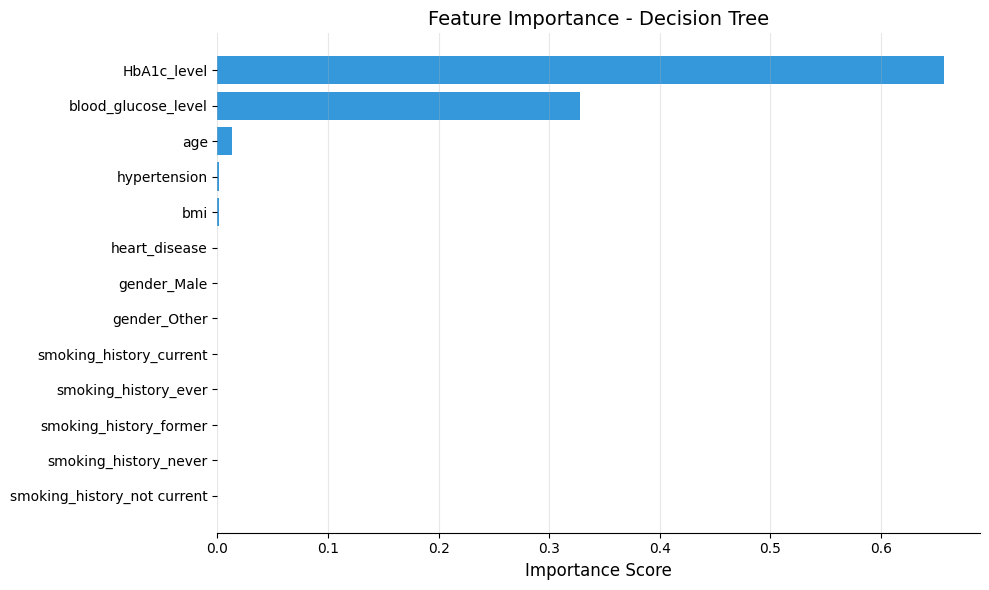

                   feature  importance
4              HbA1c_level    0.656873
5      blood_glucose_level    0.327565
0                      age    0.012717
1             hypertension    0.001747
3                      bmi    0.001099
2            heart_disease    0.000000
6              gender_Male    0.000000
7             gender_Other    0.000000
8  smoking_history_current    0.000000
9     smoking_history_ever    0.000000

SVM Feature Importance:


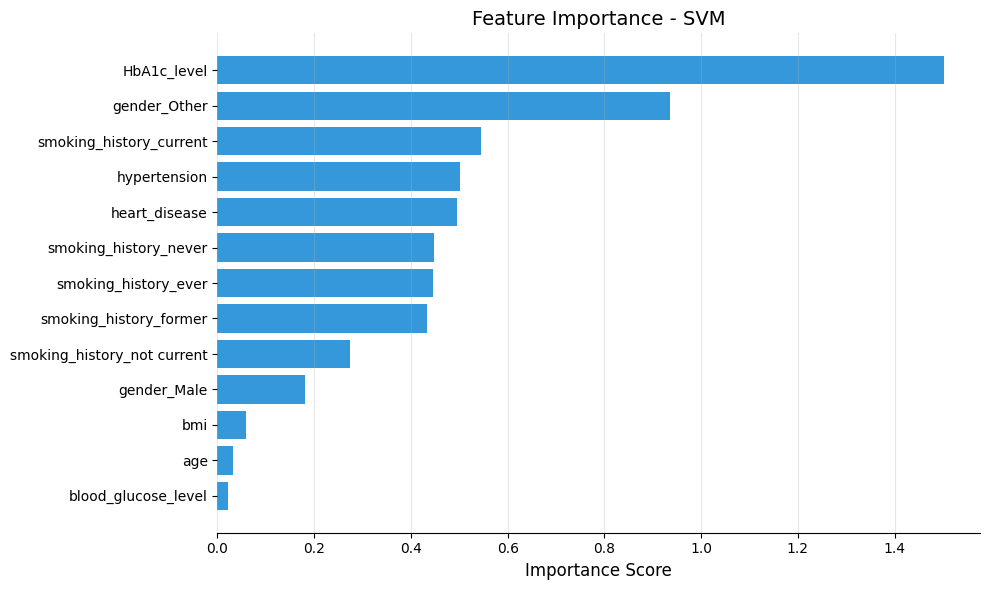

                        feature  importance
4                   HbA1c_level    1.501400
7                  gender_Other    0.935765
8       smoking_history_current    0.545638
1                  hypertension    0.500619
2                 heart_disease    0.494270
11        smoking_history_never    0.446685
9          smoking_history_ever    0.445667
10       smoking_history_former    0.432830
12  smoking_history_not current    0.273325
6                   gender_Male    0.181415

Gradient Boosting Feature Importance:


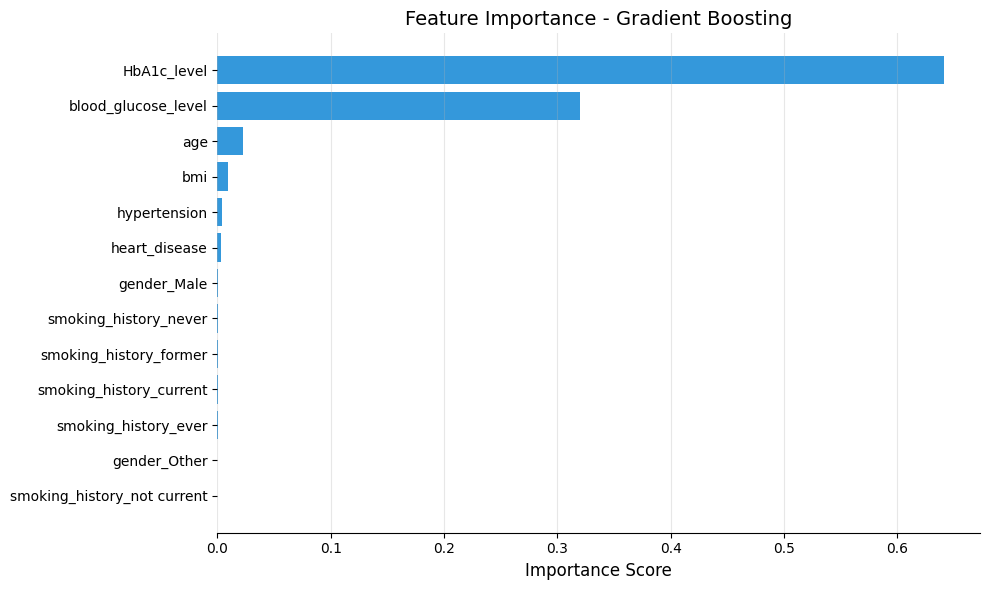

                    feature  importance
4               HbA1c_level    0.641059
5       blood_glucose_level    0.319581
0                       age    0.022529
3                       bmi    0.009296
1              hypertension    0.004082
2             heart_disease    0.002701
6               gender_Male    0.000306
11    smoking_history_never    0.000195
10   smoking_history_former    0.000167
8   smoking_history_current    0.000053


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def plot_feature_importance(model, X, y, model_name=""):
    """Plot feature importance for different model types"""

    plt.figure(figsize=(10, 6))

    # Tree-based models
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        feature_names = X.columns

    # Linear models
    elif hasattr(model, 'coef_'):
        importance = abs(model.coef_[0])
        feature_names = X.columns

    # KNN (use permutation importance)
    else:
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
        importance = result.importances_mean
        feature_names = X.columns

    # Create DataFrame and sort
    fi_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # Plot
    plt.barh(fi_df['feature'], fi_df['importance'], color='#3498db')
    plt.title(f'Feature Importance - {model_name}', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.gca().invert_yaxis()  # Most important on top
    plt.grid(axis='x', alpha=0.3)

    # Remove borders
    for spine in ['top', 'right', 'left']:
        plt.gca().spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

    return fi_df

# Usage Example (after model training):
for name, model in models.items():
    if name in ["KNN", "Logistic Regression", "SVM"]:
        X_to_use = X_test_scaled
    else:
        X_to_use = X_test

    print(f"\n{name} Feature Importance:")
    fi_df = plot_feature_importance(model, pd.DataFrame(X_to_use, columns=X.columns), y_test, name)
    print(fi_df.head(10))

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes_cleaned.csv")

# 1. Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# 2. Identify columns to scale (numeric) vs. keep as-is (categorical/binary)
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
binary_cols = ['hypertension', 'heart_disease']
categorical_cols = ['gender', 'smoking_history']

# 3. One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# 4. Apply MinMax scaling only to numeric columns
scaler = MinMaxScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# 5. Combine scaled features with binary and encoded categorical features
df_scaled = X_encoded.join(y)

# Verify the scaling
print("Original numeric ranges:")
print(X[numeric_cols].describe().loc[['min', 'max']])

print("\nScaled numeric ranges:")
print(X_encoded[numeric_cols].describe().loc[['min', 'max']])

# Show first 3 rows of scaled data
print("\nFirst 3 scaled rows:")
print(df_scaled.head(3))

Original numeric ranges:
       age    bmi  HbA1c_level  blood_glucose_level
min   0.08  10.01          3.5                 80.0
max  80.00  95.69          9.0                300.0

Scaled numeric ranges:
     age  bmi  HbA1c_level  blood_glucose_level
min  0.0  0.0          0.0                  0.0
max  1.0  1.0          1.0                  1.0

First 3 scaled rows:
        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.000000             0              1  0.177171     0.563636   
1  0.674675             0              0  0.202031     0.563636   
2  0.349349             0              0  0.202031     0.400000   

   blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0             0.272727           True        False         False   
1             0.000000           True        False         False   
2             0.354545          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0         

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes_cleaned.csv")

# Verify column names
print("Columns in dataset:", df.columns.tolist())

# Replace 'diabetes' with your actual target column name (e.g., 'Diabetes' or 'Outcome')
target_column = "diabetes"  # Change this to your actual column name

# Data Preprocessing
df = pd.get_dummies(df, columns=["gender", "smoking_history"], drop_first=True)

# Separate features (X) and target (y)
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]              # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Columns in dataset: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
Accuracy: 0.8861

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     17509
           1       0.43      0.89      0.58      1721

    accuracy                           0.89     19230
   macro avg       0.71      0.89      0.76     19230
weighted avg       0.94      0.89      0.90     19230


Confusion Matrix:
 [[15507  2002]
 [  189  1532]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load and preprocess data
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes_cleaned.csv")
df = pd.get_dummies(df, columns=["gender", "smoking_history"], drop_first=True)

# Verify target column name
print("Columns:", df.columns.tolist())
target_col = "diabetes"  # Change this if your target column has a different name

X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN, SVM, and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear', class_weight='balanced', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    # Train
    if name in ["KNN", "Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)  # Use scaled data
    else:
        model.fit(X_train, y_train)  # Tree-based models don't need scaling

    # Predict
    if name in ["KNN", "Logistic Regression", "SVM"]:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Print detailed report
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare all models
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values(by="Accuracy", ascending=False))

Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']

KNN Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.88      0.61      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.80      0.85     19230
weighted avg       0.96      0.96      0.95     19230

Confusion Matrix:
[[17369   140]
 [  666  1055]]

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     17509
           1       0.43      0.89      0.58      1721

    accuracy                           0.89     19230
   macro avg       0.71      0.89      0.76     19230
weighted avg       0.94      

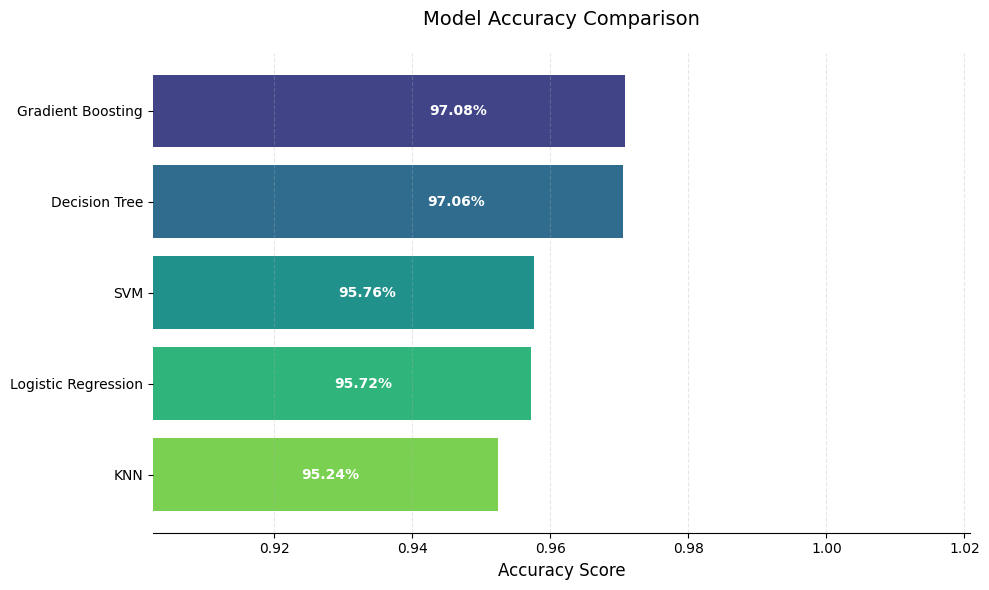


Model Accuracies:
              Model  Accuracy
  Gradient Boosting  0.970827
      Decision Tree  0.970567
                SVM  0.957618
Logistic Regression  0.957150
                KNN  0.952366


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ======================
# 1. Get Accuracy Scores from Previous Training
# ======================

# Assuming you've run the previous model training code which produced results_df
# If not, here's how to create it from model evaluation:

results = []
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "SVM": SVC(kernel='linear', probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Replace with your actual training data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy})

results_df = pd.DataFrame(results)

# ======================
# 2. Create Accuracy Comparison Graph
# ======================

# Sort by accuracy (descending)
results_df = results_df.sort_values('Accuracy', ascending=False)

# Create figure
plt.figure(figsize=(10, 6))

# Color gradient from lowest to highest accuracy
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(results_df)))

# Horizontal bar plot
bars = plt.barh(results_df['Model'], results_df['Accuracy'], color=colors)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.02,
             bar.get_y() + bar.get_height()/2,
             f'{width:.2%}',
             ha='right', va='center',
             color='white', fontweight='bold')

# Styling
plt.title('Model Accuracy Comparison', pad=20, fontsize=14)
plt.xlabel('Accuracy Score', fontsize=12)
plt.xlim(results_df['Accuracy'].min() - 0.05,
        results_df['Accuracy'].max() + 0.05)  # Dynamic range
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.gca().invert_yaxis()  # Best model on top

# Clean spines
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

# ======================
# 3. Optional: Save Results
# ======================
print("\nModel Accuracies:")
print(results_df.to_string(index=False))
plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')

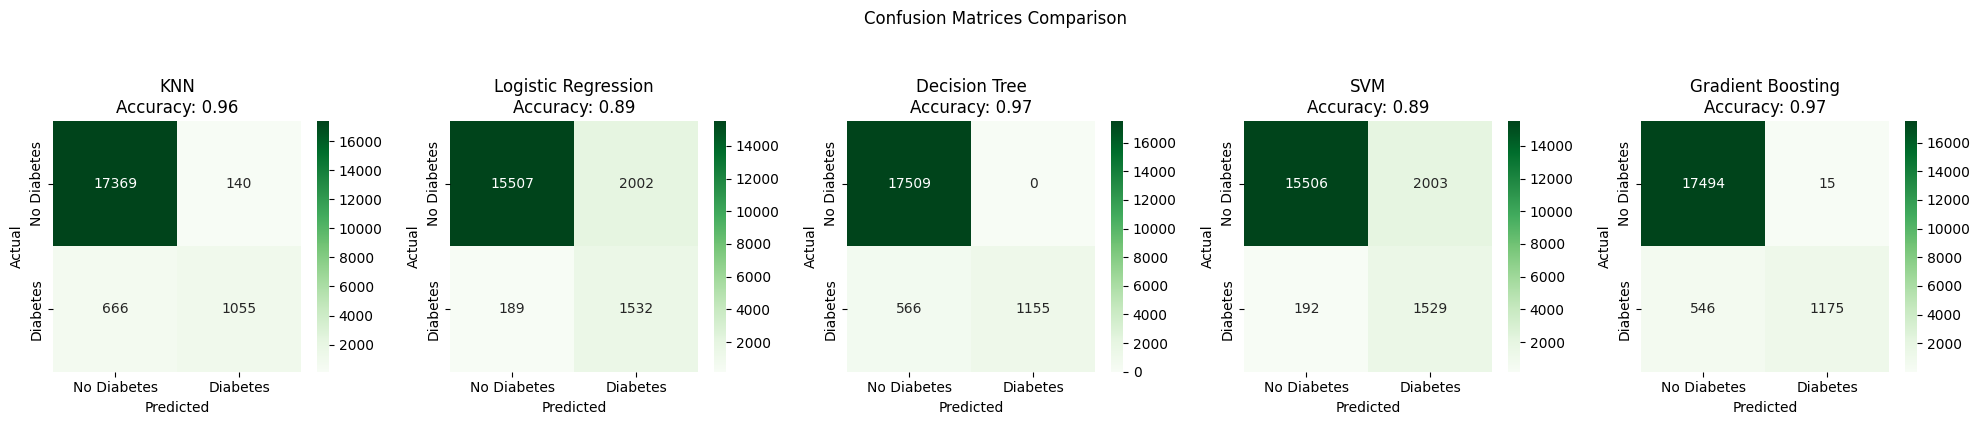

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After training all models (using the previous code), add this:

# Create subplots for all confusion matrices
plt.figure(figsize=(20, 4))
plt.suptitle("Confusion Matrices Comparison", y=1.05)

for i, (name, model) in enumerate(models.items(), 1):
    # Get predictions
    if name in ["KNN", "Logistic Regression", "SVM"]:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.subplot(1, 5, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"{name}\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

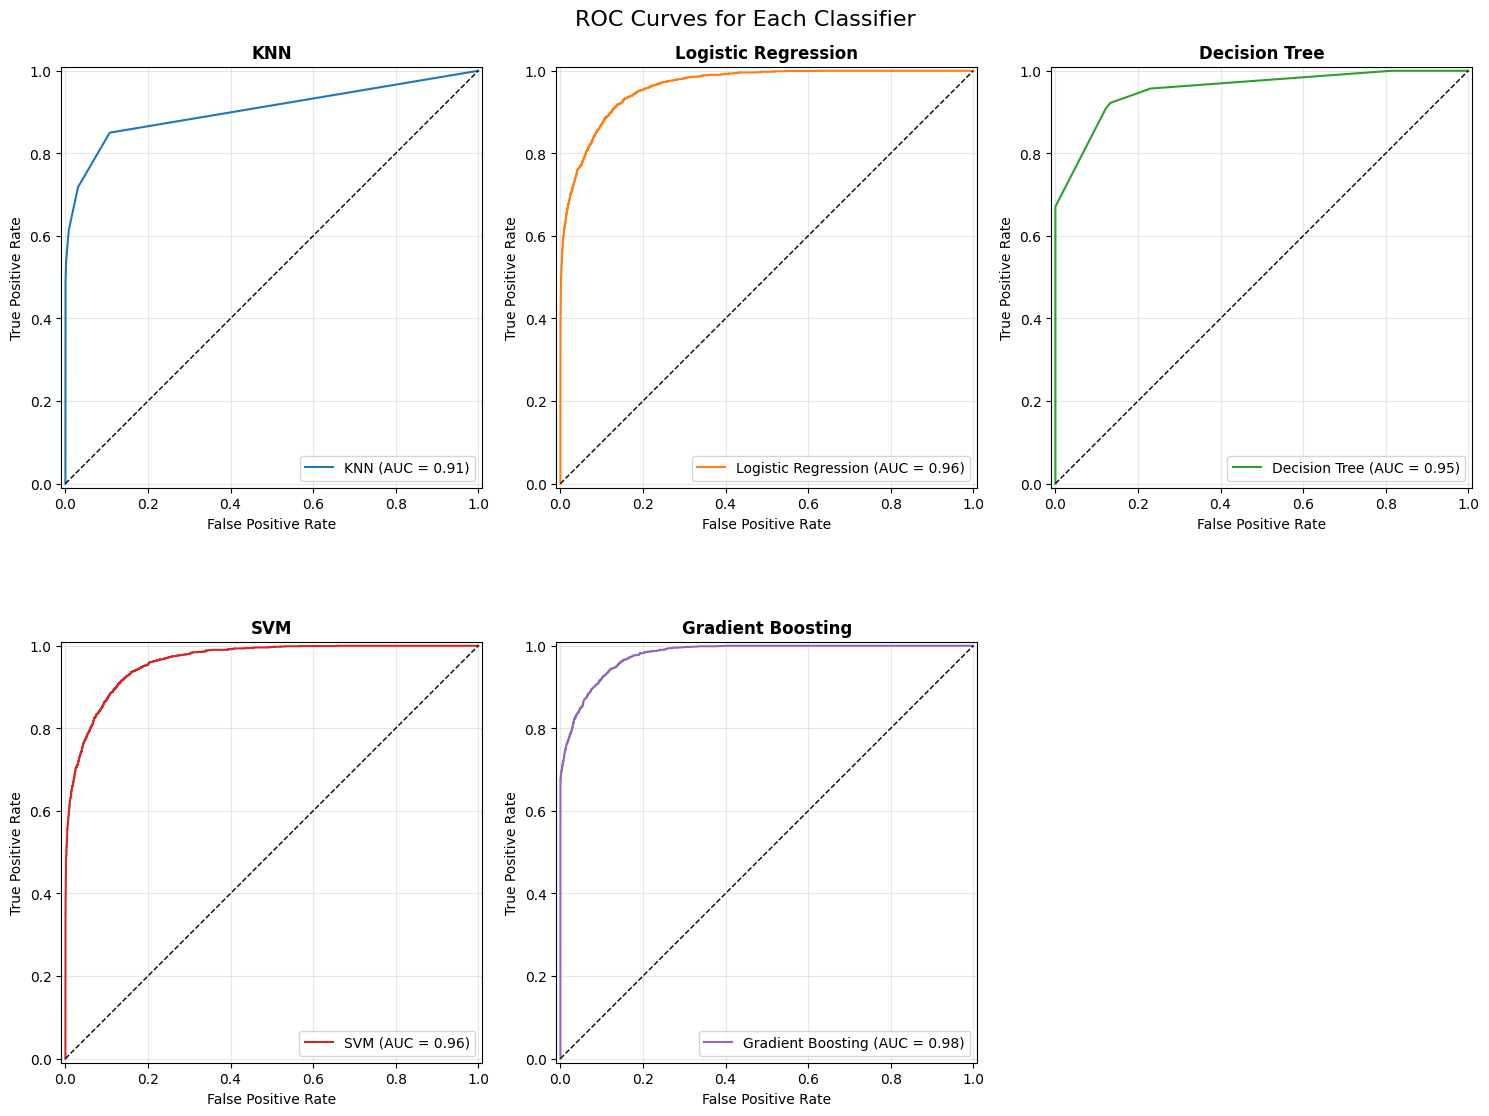

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Set up the figure
plt.figure(figsize=(15, 12))
plt.suptitle("ROC Curves for Each Classifier", y=0.95, fontsize=16)

# Plot ROC for each model in separate subplots
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout

    # Get predictions (handle scaled/unscaled data)
    if name in ["KNN", "Logistic Regression", "SVM"]:
        X_test_model = X_test_scaled
    else:
        X_test_model = X_test

    # Plot ROC curve
    RocCurveDisplay.from_estimator(
        estimator=model,
        X=X_test_model,
        y=y_test,
        name=name,
        color=plt.cm.tab10(i-1),  # Different color for each model
        ax=plt.gca()
    )

    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Diagonal line
    plt.grid(alpha=0.3)
    plt.title(f"{name}", fontweight='bold')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)

plt.tight_layout()
plt.show()